In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Cruide Oil WTI

## 7:3

In [2]:
# Đọc dữ liệu
data = pd.read_csv('Crude Oil WTI Futures Historical Data.csv').dropna()

In [3]:
# Tiền xử lý dữ liệu
# Chuyển đổi cột 'Date' thành kiểu dữ liệu datetime
data['Date'] = pd.to_datetime(data['Date'])
# Sắp xếp dữ liệu theo ngày
data.sort_values(by='Date', inplace=True)
# Đảo ngược dữ liệu để dự đoán giá trị trong tương lai
data = data.iloc[::-1].reset_index(drop=True)


In [4]:

# Chuyển đổi cột 'Vol.' thành số
# Chuyển đổi cột 'Change %' thành số
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

data['Vol.'] = data['Vol.'] .apply(convert_volume_to_number)
data['Change %'] = data['Change %'].apply(convert_change_to_number)

In [5]:
# Chuyển đổi cột 'Price' thành mảng NumPy
df = data.reset_index()['Price']
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

0       81.35
1       81.62
2       81.95
3       80.63
4       81.07
        ...  
1291    49.78
1292    48.52
1293    47.96
1294    47.09
1295    46.54
Name: Price, Length: 1296, dtype: float64

In [6]:
# Chọn các đặc trưng để huấn luyện mô hình
features = ['High']
X = data[features].copy()
# Chọn cột 'Price' làm biến mục tiêu
y = data['Price']

In [7]:
# Số lượng mẫu cho tập huấn luyện (70%)
train_size = int(len(X) * 0.7)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]


In [8]:
# Huấn luyện mô hình Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [9]:
predictions = model.predict(X_test)
predictions

array([40.4995    , 40.98265667, 39.84376667, 40.1307    , 39.6269    ,
       40.0612    , 40.542     , 40.83716667, 40.1396    , 40.83716667,
       39.8563    , 40.1279    , 39.6446    , 39.4795    , 38.7162    ,
       38.8773    , 40.0766    , 41.0093    , 39.5944    , 39.263     ,
       37.7616    , 37.1843    , 37.9677    , 36.8383    , 36.6192    ,
       37.9373    , 39.4795    , 37.9373    , 39.4481    , 38.8272    ,
       36.9935    , 37.4385    , 36.6192    , 36.15      , 36.15      ,
       36.15      , 36.15      , 36.15      , 36.15      , 36.15      ,
       36.15      , 36.15      , 36.15      , 36.15      , 36.15      ,
       36.15      , 36.15      , 36.15      , 36.15      , 36.15      ,
       36.15      , 36.15      , 36.15      , 36.15      , 36.15      ,
       36.15      , 36.15      , 36.15      , 36.15      , 36.15      ,
       36.15      , 36.15      , 36.15      , 36.15      , 36.15      ,
       36.15      , 36.15      , 36.15      , 36.15      , 36.15

In [10]:

# Đánh giá mô hình trên tập kiểm tra
test_mae = mean_absolute_error(y_test, predictions)
print('MAE:', test_mae)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)


MAE: 2.4400585487819866
Root Mean Squared Error: 6.332725512609857
Mean Absolute Percentage Error (MAPE): 10.19502479079517


In [11]:

# Dự đoán giá cho 30 ngày tiếp theo
# Lấy dữ liệu của 30 ngày cuối cùng trong tập dữ liệu gốc
last_30_days_data = X.tail(30)
# Dự đoán giá cho 30 ngày tiếp theo
next_30_days_predictions = model.predict(last_30_days_data)

print("Dự đoán giá cho 30 ngày tiếp theo:")
print(next_30_days_predictions)

Dự đoán giá cho 30 ngày tiếp theo:
[54.2506     52.839      52.3228     52.7674     52.839      52.839
 54.8165     55.0219     55.0219     54.9825     54.2506     52.839
 52.8277     52.839      53.0742     52.8277     52.839      52.839
 52.3264     52.3264     52.3264     52.1332     52.71857833 52.3228
 52.3264     48.3249     48.2989     48.5982     46.965      47.0908    ]


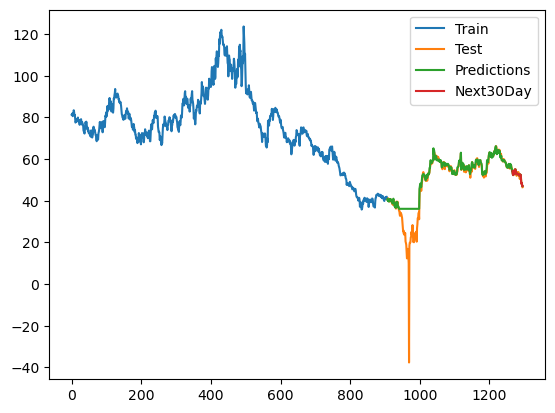

In [12]:
plt.plot(X_train.index, y_train)
plt.plot(X_test.index, y_test)
plt.plot(X_test.index, predictions)
plt.plot(last_30_days_data.index, next_30_days_predictions)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.savefig('Cruide_Oil_73.png')
plt.show()


## 8:2

In [13]:
# Số lượng mẫu cho tập huấn luyện (80%)
train_size = int(len(X) * 0.8)

# Chia dữ liệu thành tập train và tập test
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

In [14]:
# Huấn luyện mô hình Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [15]:
predictions = model.predict(X_test)
predictions

array([58.5678    , 59.2361    , 59.4296    , 65.1974    , 62.5195    ,
       64.0039    , 62.5931    , 59.5504    , 61.4676    , 61.3898    ,
       61.3744    , 61.478     , 59.4087    , 59.3099    , 59.6152    ,
       59.1853    , 59.4087    , 59.4653    , 59.4829    , 59.8751    ,
       58.7954    , 58.5667    , 58.7954    , 58.5678    , 59.4867    ,
       58.5506    , 58.2998    , 56.184     , 56.0958    , 57.6043    ,
       58.2408    , 58.2555    , 57.887     , 58.2555    , 58.259     ,
       56.7092    , 56.616     , 57.887     , 57.8731    , 57.7461    ,
       57.1856    , 57.1856    , 57.0541    , 57.1805    , 57.858     ,
       57.858     , 57.1856    , 57.0541    , 55.6982    , 54.7613    ,
       54.5276    , 54.6737    , 56.3116    , 56.0958    , 56.0692    ,
       54.6737    , 53.6342    , 53.2406    , 53.6342    , 53.3642    ,
       53.4863    , 53.2957    , 54.3209    , 54.329     , 53.0411    ,
       53.4863    , 52.42867857, 53.2406    , 52.04896667, 52.58

In [16]:

# Đánh giá mô hình trên tập kiểm tra
test_mae = mean_absolute_error(y_test, predictions)
print('MAE:', test_mae)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

MAE: 0.6196579945055063
Root Mean Squared Error: 0.9000436467402639
Mean Absolute Percentage Error (MAPE): 1.087515343229313


In [17]:
# Dự đoán giá cho 30 ngày tiếp theo
# Lấy dữ liệu của 30 ngày cuối cùng trong tập dữ liệu gốc
last_30_days_data = X.tail(30)
# Dự đoán giá cho 30 ngày tiếp theo
next_30_days_predictions = model.predict(last_30_days_data)

print("Dự đoán giá cho 30 ngày tiếp theo:")
print(next_30_days_predictions)

Dự đoán giá cho 30 ngày tiếp theo:
[53.6342     53.2406     52.1927     52.72814    53.3682     53.4219
 54.4144     54.5276     54.5276     54.5221     54.329      52.9537
 53.0656     52.9537     53.05486667 53.0656     53.4039     52.9489
 51.7443     51.9485     51.7425     50.2098     52.46458333 52.1927
 51.7443     48.425      48.4351     48.59903333 46.8813     47.0351    ]


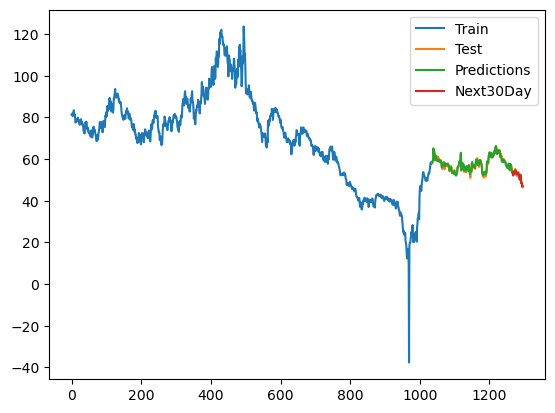

In [19]:
plt.plot(X_train.index, y_train)
plt.plot(X_test.index, y_test)
plt.plot(X_test.index, predictions)
plt.plot(last_30_days_data.index, next_30_days_predictions)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()


## 9:1

In [20]:
# Số lượng mẫu cho tập huấn luyện (90%)
train_size = int(len(X) * 0.9)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

In [21]:
# Huấn luyện mô hình Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [22]:
predictions = model.predict(X_test)
predictions

array([58.2203    , 57.6738    , 56.6497    , 57.13831   , 58.2301    ,
       59.376     , 59.1498    , 58.6611    , 59.5012    , 58.4892    ,
       57.5007    , 56.5426    , 56.3752    , 52.94474   , 53.25225   ,
       52.183     , 52.66794   , 53.0716    , 52.65234   , 53.27052857,
       53.72814   , 53.25225   , 52.72973333, 53.0447    , 51.97320667,
       53.94300333, 56.2505475 , 58.9635    , 58.3907    , 58.349     ,
       58.2203    , 60.2345    , 61.5474    , 62.53934667, 63.2603    ,
       63.07709333, 63.12756   , 61.5255    , 61.3503    , 62.9526    ,
       61.652     , 60.675     , 61.7331    , 61.652     , 61.1251    ,
       60.9397    , 63.08619333, 62.4804    , 63.5711    , 63.08619333,
       64.662     , 65.7125    , 66.18266   , 66.04235   , 64.44753333,
       62.4944    , 64.2277    , 62.7729    , 63.277     , 64.14      ,
       63.9445    , 64.0233    , 62.7858    , 63.8864    , 62.9526    ,
       60.5206    , 61.5474    , 60.0006    , 61.5644    , 60.15

In [23]:


# Đánh giá mô hình trên tập kiểm tra
test_mae = mean_absolute_error(y_test, predictions)
print('MAE:', test_mae)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

MAE: 0.6307622921245387
Root Mean Squared Error: 0.8405617960635576
Mean Absolute Percentage Error (MAPE): 1.1015801546674975


In [24]:
# Dự đoán giá cho 30 ngày tiếp theo
# Lấy dữ liệu của 30 ngày cuối cùng trong tập dữ liệu gốc
last_30_days_data = X.tail(30)
# Dự đoán giá cho 30 ngày tiếp theo
next_30_days_predictions = model.predict(last_30_days_data)

print("Dự đoán giá cho 30 ngày tiếp theo:")
print(next_30_days_predictions)

Dự đoán giá cho 30 ngày tiếp theo:
[53.94010333 53.09912357 52.2238     52.68054    53.621645   53.25225
 54.54791333 54.9988     54.826      54.25768667 54.5783     53.048
 53.03848214 53.067      53.0575     53.03848214 53.65955    53.048
 51.7443     51.9485     51.7425     50.2098     52.80413333 52.2238
 51.7443     48.425      48.4351     48.59903333 46.8813     47.0351    ]


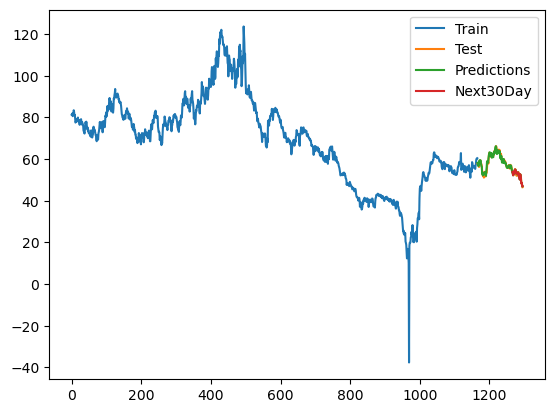

In [25]:
plt.plot(X_train.index, y_train)
plt.plot(X_test.index, y_test)
plt.plot(X_test.index, predictions)
plt.plot(last_30_days_data.index, next_30_days_predictions)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()
